Bienvenidos al laboratorio 1 de Aprendiza de Maquina con la profesora Maria Villamil
Integrantes: Juan Eduardo Briceño 202320095 - Santiago Alberto Quiroz 202216453

Empecemos con la importacion de todos las librerias que se usaran a lo largo del laboratorio

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


Ahora vamos a definir las rutas para los archivos que vamos a usar en este caso queremos el path de los datos de entrenamiento, los datos de prueba y los datos del diccionario

In [2]:
train = "./data/Datos Lab 1.csv"
test = "./data/Datos Test Lab 1.csv"
dicc = "./data/DiccPacientes.xlsx"

asdasdasd

In [3]:
df_train = pd.read_csv(train)
df_test = pd.read_csv(test, sep=";")
df_dicc = pd.read_excel(dicc)

Display


In [4]:
print("Train:", df_train.shape)
print("Test:", df_test.shape)
print("Diccionario:", df_dicc.shape)
display(df_dicc.head(1))
display(df_train.head(1))
display(df_test.describe())


Train: (1639, 24)
Test: (194, 22)
Diccionario: (24, 3)


,Nombre Columna,Tipo de dato,Comentarios
0,Patient ID,String,Identificador del paciente


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.3,1.72,38.6,100.0,112/83,228.0,...,High,N,172.0,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.88,HIGH


,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL)
count,183.000000,184.000000,187.000000,186.000000,187.000000,188.00000,186.000000,189.000000,187.000000,188.000000,188.000000,189.000000,189.000000
mean,46.464481,85.583049,1.756995,28.448113,93.666995,196.68617,55.507581,121.249915,175.748813,0.534793,125.618463,83.301741,110.572058
std,12.312220,22.159352,0.118687,7.024220,12.413227,60.02613,15.997907,31.239646,11.399690,0.074244,22.749990,14.753023,62.820276
min,25.000000,19.093000,1.398000,6.698000,70.900000,100.00000,3.410000,16.234000,150.391000,0.377000,90.000000,60.000000,-6.000000
25%,38.000000,65.362250,1.660000,22.908250,82.724000,137.00000,42.250000,98.000000,166.000000,0.484750,107.000000,70.000000,58.000000
50%,44.000000,86.962500,1.760000,28.371500,95.209000,197.00000,55.500000,123.000000,176.000000,0.532000,121.000000,84.000000,106.000000
75%,55.000000,106.525000,1.850000,33.575000,103.050000,251.00000,67.000000,141.000000,185.000000,0.586500,142.000000,93.000000,161.000000
max,77.000000,119.700000,1.989000,49.649000,134.089000,299.00000,89.000000,197.000000,198.949000,0.790000,195.271000,130.029000,289.119000


In [5]:
import random


duplicados = df_train['Patient ID'].value_counts()

iterables = duplicados[duplicados > 1]
#print(df_train['Patient ID'].value_counts())
#print(iterables.shape)
for patient_id in duplicados.keys():
    variable = df_train.loc[df_train['Patient ID'] == patient_id].iloc
    contador = 0
    if duplicados.empty == False:
        for cosas in variable:
            contador += 1
        for i in range(0, contador-1):
            if (variable[i]['Patient ID'] == patient_id and i < contador-1):
                if variable[i].equals(variable[i+1]):
                    df_train = df_train[df_train['Patient ID'] != patient_id]
                else:
                    new_id = random.randint(100000, 999999)
                    print(f"Cambiando ID duplicado {patient_id} por {new_id} en la fila {i}")
                    variable[i-1]['Patient ID'] = new_id
                    df_train = df_train[df_train['Patient ID'] != patient_id]
                    df_train = pd.concat([df_train, variable[i+1]], ignore_index=True)



Cambiando ID duplicado AhYt1346 por 387082 en la fila 0
Cambiando ID duplicado AhYt1346 por 639488 en la fila 1
Cambiando ID duplicado RlsB8509 por 392260 en la fila 0
Cambiando ID duplicado RlsB8509 por 711416 en la fila 1
Cambiando ID duplicado RwGu5647 por 827468 en la fila 0
Cambiando ID duplicado RwGu5647 por 408487 en la fila 1
Cambiando ID duplicado dJuC5084 por 407103 en la fila 1
Cambiando ID duplicado YLCe2926 por 130283 en la fila 1
Cambiando ID duplicado dSiv4949 por 893812 en la fila 0
Cambiando ID duplicado dSiv4949 por 316913 en la fila 1
Cambiando ID duplicado pEpZ9034 por 864832 en la fila 0
Cambiando ID duplicado STpP5810 por 162000 en la fila 0
Cambiando ID duplicado STpP5810 por 843261 en la fila 1
Cambiando ID duplicado DhUJ7239 por 700635 en la fila 0
Cambiando ID duplicado DhUJ7239 por 165692 en la fila 1
Cambiando ID duplicado gdBF9655 por 499105 en la fila 1
Cambiando ID duplicado INdI1482 por 260648 en la fila 0
Cambiando ID duplicado INdI1482 por 274692 en la

C:\Users\Santiago\AppData\Local\Temp\ipykernel_1912\1419393414.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable[i-1]['Patient ID'] = new_id
C:\Users\Santiago\AppData\Local\Temp\ipykernel_1912\1419393414.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable[i-1]['Patient ID'] = new_id
C:\Users\Santiago\AppData\Local\Temp\ipykernel_1912\1419393414.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable[i-1]['Pa

Cambiando ID duplicado gXxm9399 por 832613 en la fila 0
Cambiando ID duplicado TPHC2670 por 553697 en la fila 0
Cambiando ID duplicado mrZW4662 por 532029 en la fila 0
Cambiando ID duplicado bCoz6266 por 945737 en la fila 0
Cambiando ID duplicado rfYk3516 por 605572 en la fila 1
Cambiando ID duplicado QAxZ5540 por 667939 en la fila 1
Cambiando ID duplicado GhAN9460 por 836803 en la fila 0
Cambiando ID duplicado Kbzi4901 por 992728 en la fila 0
Cambiando ID duplicado ChGR7779 por 474281 en la fila 1
Cambiando ID duplicado KGuE6384 por 416611 en la fila 1
Cambiando ID duplicado IwMD4008 por 679926 en la fila 0
Cambiando ID duplicado ZoSr4813 por 296788 en la fila 1
Cambiando ID duplicado inTX4760 por 879429 en la fila 0
Cambiando ID duplicado inTX4760 por 513708 en la fila 1
Cambiando ID duplicado PHii0023 por 728912 en la fila 1
Cambiando ID duplicado wMaN5754 por 357661 en la fila 0
Cambiando ID duplicado Lclg1001 por 767529 en la fila 1
Cambiando ID duplicado THSJ8564 por 292019 en la

C:\Users\Santiago\AppData\Local\Temp\ipykernel_1912\1419393414.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable[i-1]['Patient ID'] = new_id
C:\Users\Santiago\AppData\Local\Temp\ipykernel_1912\1419393414.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable[i-1]['Patient ID'] = new_id
C:\Users\Santiago\AppData\Local\Temp\ipykernel_1912\1419393414.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable[i-1]['Pa

Cambiando ID duplicado QoLE0357 por 995630 en la fila 0
Cambiando ID duplicado QRhH2884 por 125452 en la fila 0
Cambiando ID duplicado Wctu6941 por 263993 en la fila 0
Cambiando ID duplicado KYAn6843 por 702281 en la fila 0


C:\Users\Santiago\AppData\Local\Temp\ipykernel_1912\1419393414.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable[i-1]['Patient ID'] = new_id
C:\Users\Santiago\AppData\Local\Temp\ipykernel_1912\1419393414.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable[i-1]['Patient ID'] = new_id
C:\Users\Santiago\AppData\Local\Temp\ipykernel_1912\1419393414.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable[i-1]['Pa

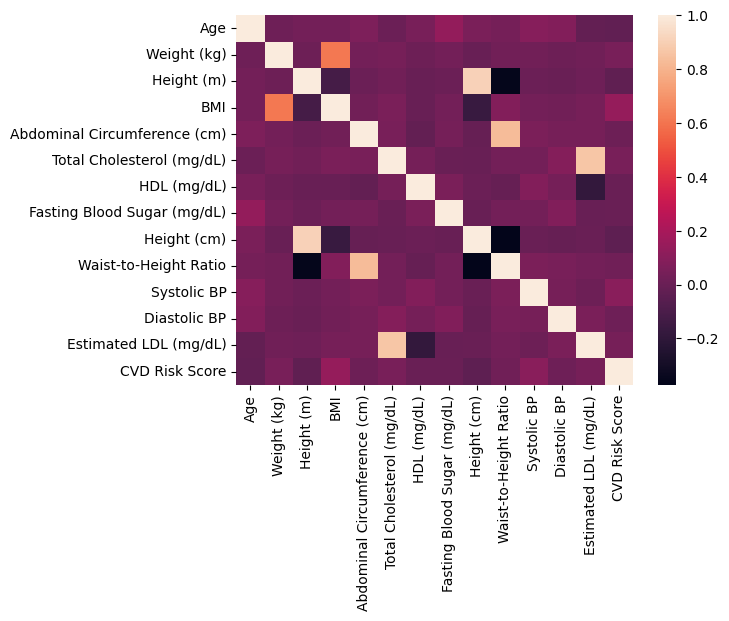

In [6]:
#Elminación de variables categóricas
sns.heatmap(df_train.corr(numeric_only=True))


cat = ['Patient ID', 'Date of Service']

In [7]:
def quality_report(df, name="df"):
    miss = df.isna().sum().sort_values(ascending=False)
    miss_pct = (df.isna().mean() * 100).sort_values(ascending=False)
    print(f"\n=== {name} ===")
    print("Filas, columnas:", df.shape)
    print("Nulos totales:", int(df.isna().sum().sum()))
    print("Top nulos (conteo):")
    display(miss.head(12).to_frame("missing_count"))
    print("Top nulos (%):")
    display(miss_pct.head(12).to_frame("missing_pct"))

    print("Duplicados fila completa:", int(df.duplicated().sum()))

quality_report(df_train, "TRAIN (crudo)")
quality_report(df_test, "TEST (crudo)")


print("\nTarget missing en train:", int(df_train["CVD Risk Score"].isna().sum()))


=== TRAIN (crudo) ===
Filas, columnas: (4703, 25)
Nulos totales: 86021
Top nulos (conteo):


,missing_count
Weight (kg),3554
HDL (mg/dL),3554
Waist-to-Height Ratio,3552
Age,3549
Total Cholesterol (mg/dL),3549
Height (cm),3547
Systolic BP,3547
Diastolic BP,3543
Fasting Blood Sugar (mg/dL),3540
Height (m),3539


Top nulos (%):


,missing_pct
Weight (kg),75.568786
HDL (mg/dL),75.568786
Waist-to-Height Ratio,75.526260
Age,75.462471
Total Cholesterol (mg/dL),75.462471
Height (cm),75.419945
Systolic BP,75.419945
Diastolic BP,75.334893
Fasting Blood Sugar (mg/dL),75.271104
Height (m),75.249841


Duplicados fila completa: 2296

=== TEST (crudo) ===
Filas, columnas: (194, 22)
Nulos totales: 91
Top nulos (conteo):


,missing_count
Age,11
Weight (kg),10
HDL (mg/dL),8
BMI,8
Height (m),7
Abdominal Circumference (cm),7
Height (cm),7
Waist-to-Height Ratio,6
Total Cholesterol (mg/dL),6
Systolic BP,6


Top nulos (%):


,missing_pct
Age,5.670103
Weight (kg),5.154639
HDL (mg/dL),4.123711
BMI,4.123711
Height (m),3.608247
Abdominal Circumference (cm),3.608247
Height (cm),3.608247
Waist-to-Height Ratio,3.092784
Total Cholesterol (mg/dL),3.092784
Systolic BP,3.092784


Duplicados fila completa: 5

Target missing en train: 3525


In [8]:
import numpy as np
from sklearn import linear_model
import pandas as pd

# 1. Definir función auxiliar
def mode_or_nan(s):
    s = s.dropna()
    if s.empty:
        return np.nan
    return s.mode().iloc[0]

# 2. Definir columnas
target = "CVD Risk Score"
id_cols = ['Patient ID', 'Date of Service']

# 3. Identificar columnas numéricas ANTES de agrupar
cols_to_remove = ["CVD Risk Score", "CVD Risk Level", "Patient ID", "Date of Service"]
key_cols = [
    c for c in df_train.columns 
    if c not in cols_to_remove and pd.api.types.is_numeric_dtype(df_train[c])
]

print("Features numéricas encontradas:", key_cols)

# 4. Crear diccionario de agregación para TODAS las columnas
agg_dict = {
    "CVD Risk Score": "median",
    "CVD Risk Level": mode_or_nan
}

# Agregar todas las features numéricas (usar mediana para agregarlas)
for col in key_cols:
    agg_dict[col] = "median"  # o 'mean' si prefieres

# 5. Limpiar y agregar datos
df_train_clean = (
    df_train.dropna(subset=[target])
    .groupby(id_cols, dropna=False, as_index=False)
    .agg(agg_dict)
)

print("Shape después de agrupar:", df_train_clean.shape)
print("Columnas disponibles:", df_train_clean.columns.tolist())

# 6. Preparar datos para modelado
df_model = df_train_clean.dropna(subset=key_cols)
print("Shape final para modelo:", df_model.shape)

# 7. Entrenar modelo
Modelo = linear_model.LinearRegression()
Modelo.fit(df_model[key_cols], df_model[target])

print(f"\nR² Score: {Modelo.score(df_model[key_cols], df_model[target]):.4f}")

Features numéricas encontradas: ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Abdominal Circumference (cm)', 'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Height (cm)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP', 'Estimated LDL (mg/dL)']
Shape después de agrupar: (1178, 17)
Columnas disponibles: ['Patient ID', 'Date of Service', 'CVD Risk Score', 'CVD Risk Level', 'Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Abdominal Circumference (cm)', 'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Height (cm)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP', 'Estimated LDL (mg/dL)']
Shape final para modelo: (696, 17)

R² Score: 0.0390
